In [1]:
import tensorflow as tf
import keras
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from keras import layers, Sequential

#### Load Data

In [2]:
(train_images, train_labels), _ = mnist.load_data()

##### 백색 잡음 픽셀, 0픽셀 추가

In [3]:
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255
train_images_with_noise_channels = np.concatenate([
    train_images, np.random.random((len(train_images), 784))
], axis=1)
train_images_with_zeros_channels = np.concatenate([
    train_images, np.zeros((len(train_images), 784))
], axis=1)

##### 모델 훈련

In [13]:
import models_function

In [5]:
model = models_function.get_relu_softmax()

In [6]:
history_noise = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
  1/375 [..............................] - ETA: 1:10 - loss: 2.3860 - accuracy: 0.0859

2023-07-17 09:37:51.270709: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


375/375 [==============================] - 2s 5ms/step - loss: 0.6285 - accuracy: 0.8118 - val_loss: 0.2490 - val_accuracy: 0.9260
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2469 - accuracy: 0.9236 - val_loss: 0.1701 - val_accuracy: 0.9501
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1630 - accuracy: 0.9493 - val_loss: 0.1607 - val_accuracy: 0.9513
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1138 - accuracy: 0.9641 - val_loss: 0.1645 - val_accuracy: 0.9540
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0842 - accuracy: 0.9730 - val_loss: 0.1178 - val_accuracy: 0.9658
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0609 - accuracy: 0.9800 - val_loss: 0.1439 - val_accuracy: 0.9599
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0456 - accuracy: 0.9850 - val_loss: 0.1232 - val_accuracy: 0.9662
Epoch 8/10
375/37

In [7]:
model = models_function.get_relu_softmax() # reset model
history_zeros = model.fit(train_images_with_noise_channels, train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 2s 4ms/step - loss: 0.6455 - accuracy: 0.8093 - val_loss: 0.2606 - val_accuracy: 0.9253
Epoch 2/10
375/375 [==============================] - 2s 4ms/step - loss: 0.2492 - accuracy: 0.9226 - val_loss: 0.2461 - val_accuracy: 0.9199
Epoch 3/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1616 - accuracy: 0.9504 - val_loss: 0.1491 - val_accuracy: 0.9563
Epoch 4/10
375/375 [==============================] - 2s 4ms/step - loss: 0.1158 - accuracy: 0.9633 - val_loss: 0.1354 - val_accuracy: 0.9598
Epoch 5/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0836 - accuracy: 0.9739 - val_loss: 0.1360 - val_accuracy: 0.9622
Epoch 6/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0640 - accuracy: 0.9797 - val_loss: 0.1274 - val_accuracy: 0.9653
Epoch 7/10
375/375 [==============================] - 2s 4ms/step - loss: 0.0465 - accuracy: 0.9854 - val_loss: 0.1266 - val_accuracy: 0.9672
Epoch 

#### History 시각화

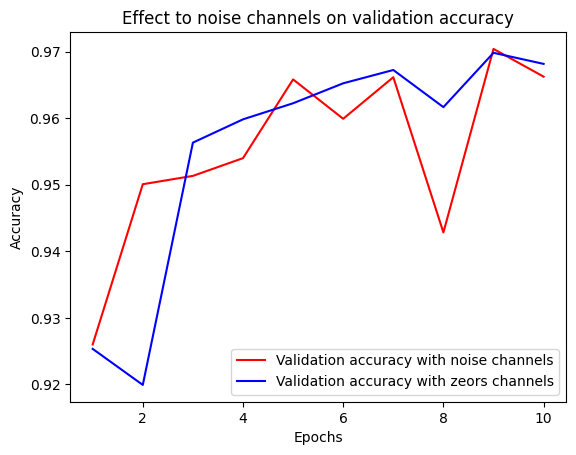

In [8]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'r-', label = 'Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b-', label = 'Validation accuracy with zeors channels')
plt.title('Effect to noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

#### 일반화

In [9]:
(trian_images, train_labels), _ = mnist.load_data()
train_images = train_images.reshape((60000, 28*28))
train_images = train_images.astype('float32')/255

random_train_labels = train_labels[:]
np.random.shuffle(random_train_labels)

model = models_function.get_relu_softmax()

In [10]:
h = model.fit(train_images, random_train_labels, epochs=10, batch_size=128, validation_split=0.2)

Epoch 1/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3016 - accuracy: 0.1101 - val_loss: 2.3013 - val_accuracy: 0.1136
Epoch 2/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3014 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1136
Epoch 3/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3012 - accuracy: 0.1121 - val_loss: 2.3013 - val_accuracy: 0.1136
Epoch 4/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3008 - accuracy: 0.1121 - val_loss: 2.3016 - val_accuracy: 0.1135
Epoch 5/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3006 - accuracy: 0.1119 - val_loss: 2.3014 - val_accuracy: 0.1134
Epoch 6/10
375/375 [==============================] - 1s 3ms/step - loss: 2.3003 - accuracy: 0.1127 - val_loss: 2.3013 - val_accuracy: 0.1133
Epoch 7/10
375/375 [==============================] - 1s 3ms/step - loss: 2.2999 - accuracy: 0.1138 - val_loss: 2.3015 - val_accuracy: 0.1114
Epoch 

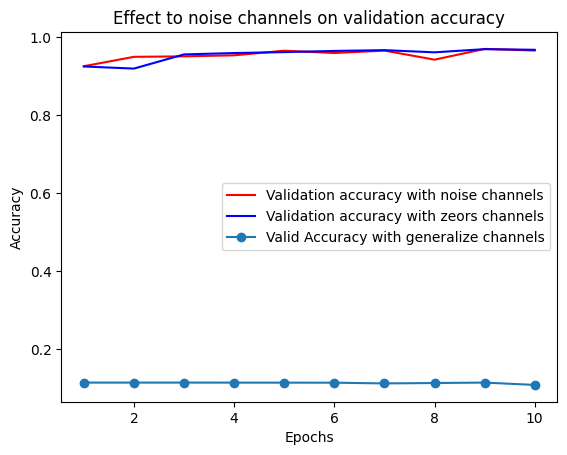

In [11]:
val_acc_noise = history_noise.history['val_accuracy']
val_acc_zeros = history_zeros.history['val_accuracy']
vall_acc_general = h.history['val_accuracy']
epochs = range(1,11)
plt.plot(epochs, val_acc_noise, 'r-', label = 'Validation accuracy with noise channels')
plt.plot(epochs, val_acc_zeros, 'b-', label = 'Validation accuracy with zeors channels')
plt.plot(epochs, vall_acc_general, 'o-', label = 'Valid Accuracy with generalize channels')
plt.title('Effect to noise channels on validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()